In [17]:
import numpy as np
from astropy import units as u

an Earth composition core satisfies a relation : 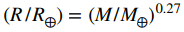

In [18]:
def avg_rho_from_Mp(Mp,verbose = 0):
    '''take a mass value and calculate avg core density using Valencia et al. 2006'''
    Rp = ((Mp/u.Mearth)**0.27)*u.Rearth # Valencia et al. 2006
    rhop = Mp / (4*np.pi*(Rp**3)/3)
    rhop_cgs = rhop.cgs
    Mp_Smass = Mp.to(u.Msun)
    if verbose == 1:
        print("for planet mass : {f}".format(f = Mp), "\n\t\tor {g}".format(g = Mp.to(u.Msun)))
        print("planet core avg rho : {f}".format(f = rhop_cgs))
    if verbose == 2:
        print(Rp)
        print(rhop)
        print(rhop_cgs)
        print("for planet mass : {f}".format(f = Mp))
        print("\n\tor {g}".format(g = Mp.to(u.Msun)))
        print("planet core avg rho : {f}".format(f = rhop_cgs))
    return (rhop_cgs,Mp_Smass)

In [7]:
fnames = ["inlist_1a_create"]
script = ["#!/bin/sh\n\n"]
for fn in fnames:
    script.append("mv "+fn+" inlist\n")
    script.append("./clean\n")
    script.append("./mk\n")
    script.append("./rn\n")
    script.append("mv "+"inlist "+fn+"\n")
    script.append("mv LOGS LOGS_"+fn+"\n")
    script.append("ls\n")

In [8]:
print(script)

['#!/bin/sh\n\n', 'mv inlist_1a_create inlist\n', './clean\n', './mk\n', './rn\n', 'mv inlist inlist_1a_create\n', 'mv LOGS LOGS_inlist_1a_create\n', 'ls\n']


In [10]:
with open('script_1a.sh','w') as f:
    f.writelines(script)
    f.close

In [3]:
# Re = 1*u.Rearth
# Me = 1*u.Mearth
# Mp = 10*u.Mearth

# beginning 1b

In [15]:
with open('inlist_1b_core') as f:
    lines = f.readlines()
    print(lines[7], lines[10], lines[14], lines[15], lines[51])
    f.close

      saved_model_name = "planet_1a_create.mod"
       save_model_filename = "planet_1b_core_10ME.mod"
       new_core_mass = 3.0034893488507933e-05 ! 10 Mearth in Msun units
       core_avg_rho = 8.51078118665938 ! g/cm^3
 	star_history_name = "history_1b_core_15=ME"



In [19]:
m_multiples = np.array([3,5,7,10,12])
masses_in_Emass = m_multiples * u.Mearth
files_to_write = []
fnames = []
for i,mass in enumerate(masses_in_Emass):
    avg_rho_cgs, Mp_Smass = avg_rho_from_Mp(mass,verbose = 1)
    with open('inlist_1b_core') as f:
        lines = f.readlines()
        lines[10] = "\tsave_model_filename = \"planet_1b_core_"+str(m_multiples[i])+"ME.mod\"\n"
        lines[14] = "\tnew_core_mass = "+str(Mp_Smass.value)+" ! "+str(m_multiples[i])+" Mearth in Msun units\n"
        lines[15] = "\tcore_avg_rho = "+str(avg_rho_cgs.value)+" ! g/cm^3\n"
        lines[51] = "\tstar_history_name = \"history_1b_core_"+str(m_multiples[i])+"=ME\"\n"
        files_to_write.append(lines)
        fnames.append("inlist_1b_core_"+str(m_multiples[i])+"ME")
        f.close
    print(fnames[-1])
    print("\n")

for planet mass : 3.0 earthMass 
		or 9.01046804655238e-06 solMass
planet core avg rho : 6.7705268276637325 g / cm3
inlist_1b_core_3ME


for planet mass : 5.0 earthMass 
		or 1.5017446744253966e-05 solMass
planet core avg rho : 7.460599481094487 g / cm3
inlist_1b_core_5ME


for planet mass : 7.0 earthMass 
		or 2.1024425441955554e-05 solMass
planet core avg rho : 7.953129470852457 g / cm3
inlist_1b_core_7ME


for planet mass : 10.0 earthMass 
		or 3.0034893488507933e-05 solMass
planet core avg rho : 8.51078118665938 g / cm3
inlist_1b_core_10ME


for planet mass : 12.0 earthMass 
		or 3.604187218620952e-05 solMass
planet core avg rho : 8.81076994423131 g / cm3
inlist_1b_core_12ME




In [21]:
for i,w_files in enumerate(fnames):
    with open(str(w_files),'w') as f:
        f.writelines(files_to_write[i])
        f.close

In [28]:
script = ["#!/bin/sh\n\n"]
for fn in fnames:
    script.append("mv "+fn+" inlist\n")
    script.append("./clean\n")
    script.append("./mk\n")
    script.append("./rn\n")
    script.append("mv "+"inlist "+fn+"\n")
    script.append("mv LOGS LOGS_"+fn+"\n")
    script.append("ls\n")

In [29]:
script

['#!/bin/sh\n\n',
 'mv inlist_1b_core_3ME inlist\n',
 './clean\n',
 './mk\n',
 './rn\n',
 'mv inlist inlist_1b_core_3ME\n',
 'mv LOGS LOGS_inlist_1b_core_3ME\n',
 'ls\n',
 'mv inlist_1b_core_5ME inlist\n',
 './clean\n',
 './mk\n',
 './rn\n',
 'mv inlist inlist_1b_core_5ME\n',
 'mv LOGS LOGS_inlist_1b_core_5ME\n',
 'ls\n',
 'mv inlist_1b_core_7ME inlist\n',
 './clean\n',
 './mk\n',
 './rn\n',
 'mv inlist inlist_1b_core_7ME\n',
 'mv LOGS LOGS_inlist_1b_core_7ME\n',
 'ls\n',
 'mv inlist_1b_core_10ME inlist\n',
 './clean\n',
 './mk\n',
 './rn\n',
 'mv inlist inlist_1b_core_10ME\n',
 'mv LOGS LOGS_inlist_1b_core_10ME\n',
 'ls\n',
 'mv inlist_1b_core_12ME inlist\n',
 './clean\n',
 './mk\n',
 './rn\n',
 'mv inlist inlist_1b_core_12ME\n',
 'mv LOGS LOGS_inlist_1b_core_12ME\n',
 'ls\n']

In [30]:
with open('script_1b.sh','w') as f:
    f.writelines(script)
    f.close

# begin 1c

In [31]:
with open('inlist_1c_reducemass') as f:
    lines = f.readlines()
    print(lines[7], lines[10], lines[16], lines[59])
    f.close

      saved_model_name = "planet_1b_core_15ME.mod"
       save_model_filename = "planet_1c_reducemass_15ME_0.1.mod" !!Change Mcore and fenv in file name
       new_mass = 5.00737e-05   ! careful, this mass has to be written in solar masses!!
 	star_history_name = "history_1c_reducemass_15ME_0.1"   !!Change Mcore and fenv in file name 



In [32]:
# fenv = Menv / Mp
# Mp = Menv + Mc
# Mp = Mc / (1-fenv)
core_masses = np.array([3,5,7,10,12]) * u.Mearth
# print(core_masses)
fenvs = np.array([0.1,0.01])
total_masses = []
for fenv in fenvs:
    plant_mass_array = []
    for mass in core_masses:
        plant_mass_array.append(mass/(1-fenv))
    total_masses.append(plant_mass_array)
newmass_fp1 = []
newmass_fp01 = []
for planet_mass in total_masses[0]:
    newmass_fp1.append(planet_mass.to(u.Msun))
for planet_mass in total_masses[1]:
    newmass_fp01.append(planet_mass.to(u.Msun))
print(newmass_fp1)
print(newmass_fp01)
total_masses_Msun = [newmass_fp1,newmass_fp01]

[<Quantity 1.00116312e-05 solMass>, <Quantity 1.66860519e-05 solMass>, <Quantity 2.33604727e-05 solMass>, <Quantity 3.33721039e-05 solMass>, <Quantity 4.00465247e-05 solMass>]
[<Quantity 9.10148288e-06 solMass>, <Quantity 1.51691381e-05 solMass>, <Quantity 2.12367934e-05 solMass>, <Quantity 3.03382763e-05 solMass>, <Quantity 3.64059315e-05 solMass>]


In [33]:
msun_core_masses = core_masses.to(u.Msun)

# test the above calculation
for i, core in enumerate(msun_core_masses):
    print(1-(core/newmass_fp1[i]))
for i, core in enumerate(msun_core_masses):
    print(1-(core/newmass_fp01[i]))

0.09999999999999998
0.09999999999999998
0.09999999999999998
0.09999999999999998
0.09999999999999998
0.010000000000000009
0.010000000000000009
0.01000000000000012
0.010000000000000009
0.010000000000000009


In [34]:
files_to_write = []
fnames = []
for j,fenv in enumerate(fenvs):
    for i,mass in enumerate(masses_in_Emass):
        with open('inlist_1c_reducemass') as f:
            lines = f.readlines()
            lines[7] = "\tsaved_model_name = \"planet_1b_core_"+str(m_multiples[i])+"ME.mod\"\n"
            lines[10] = "\tsave_model_filename = \"planet_1c_reducemass_"+str(m_multiples[i])+"ME_"+str(fenv)+".mod\" !!Change Mcore and fenv in file name\n"
            lines[16] = "\tnew_mass = "+str(total_masses_Msun[j][i].value)+"   ! careful, this mass has to be written in solar masses!!\n"
            lines[59] = "\tstar_history_name = \"history_1c_reducemass_"+str(m_multiples[i])+"ME_"+str(fenv)+"\"   !!Change Mcore and fenv in file name\n"
            files_to_write.append(lines)
            fnames.append("inlist_1c_reducemass_"+str(m_multiples[i])+"ME_"+str(fenv))
            f.close
        print(fnames[-1])
        print("\n")

inlist_1c_reducemass_3ME_0.1


inlist_1c_reducemass_5ME_0.1


inlist_1c_reducemass_7ME_0.1


inlist_1c_reducemass_10ME_0.1


inlist_1c_reducemass_12ME_0.1


inlist_1c_reducemass_3ME_0.01


inlist_1c_reducemass_5ME_0.01


inlist_1c_reducemass_7ME_0.01


inlist_1c_reducemass_10ME_0.01


inlist_1c_reducemass_12ME_0.01




In [35]:
print(files_to_write[-1][7], files_to_write[-1][10], files_to_write[-1][16], files_to_write[-1][59])

	saved_model_name = "planet_1b_core_12ME.mod"
 	save_model_filename = "planet_1c_reducemass_12ME_0.01.mod" !!Change Mcore and fenv in file name
 	new_mass = 3.640593150122174e-05   ! careful, this mass has to be written in solar masses!!
 	star_history_name = "history_1c_reducemass_12ME_0.01"   !!Change Mcore and fenv in file name



In [36]:
for i,w_files in enumerate(fnames):
    with open(str(w_files),'w') as f:
        f.writelines(files_to_write[i])
        f.close

In [37]:
script = ["#!/bin/sh\n\n"]
for fn in fnames:
    script.append("mv "+fn+" inlist\n")
    script.append("./clean\n")
    script.append("./mk\n")
    script.append("./rn\n")
    script.append("mv "+"inlist "+fn+"\n")
    script.append("mv LOGS LOGS_"+fn+"\n")
    script.append("ls\n")

In [40]:
script

['#!/bin/sh\n\n',
 'mv inlist_1c_reducemass_3ME_0.1 inlist\n',
 './clean\n',
 './mk\n',
 './rn\n',
 'mv inlist inlist_1c_reducemass_3ME_0.1\n',
 'mv LOGS LOGS_inlist_1c_reducemass_3ME_0.1\n',
 'ls\n',
 'mv inlist_1c_reducemass_5ME_0.1 inlist\n',
 './clean\n',
 './mk\n',
 './rn\n',
 'mv inlist inlist_1c_reducemass_5ME_0.1\n',
 'mv LOGS LOGS_inlist_1c_reducemass_5ME_0.1\n',
 'ls\n',
 'mv inlist_1c_reducemass_7ME_0.1 inlist\n',
 './clean\n',
 './mk\n',
 './rn\n',
 'mv inlist inlist_1c_reducemass_7ME_0.1\n',
 'mv LOGS LOGS_inlist_1c_reducemass_7ME_0.1\n',
 'ls\n',
 'mv inlist_1c_reducemass_10ME_0.1 inlist\n',
 './clean\n',
 './mk\n',
 './rn\n',
 'mv inlist inlist_1c_reducemass_10ME_0.1\n',
 'mv LOGS LOGS_inlist_1c_reducemass_10ME_0.1\n',
 'ls\n',
 'mv inlist_1c_reducemass_12ME_0.1 inlist\n',
 './clean\n',
 './mk\n',
 './rn\n',
 'mv inlist inlist_1c_reducemass_12ME_0.1\n',
 'mv LOGS LOGS_inlist_1c_reducemass_12ME_0.1\n',
 'ls\n',
 'mv inlist_1c_reducemass_3ME_0.01 inlist\n',
 './clean\n',
 

In [39]:
with open('script_1c.sh','w') as f:
    f.writelines(script)
    f.close

# entropy change

In [51]:
with open('inlist_1d_setS') as f:
    lines = f.readlines()
    print(lines[7], lines[10], lines[52], lines[31])
    f.close

      saved_model_name = "planet_1c_reducemass_15ME_0.1.mod"
       save_model_filename = "planet_1d_setS_15ME_0.1_9.0.mod"
 	star_history_name = "history_1d_setS_15ME_0.1_9.0"
       pause_before_terminate = .true. ! lets you examine the final pgstar window when run terminates



In [52]:
files_to_write = []
fnames = []
for j,fenv in enumerate(fenvs):
    for i,mass in enumerate(masses_in_Emass):
        with open('inlist_1d_setS') as f:
            lines = f.readlines()
            lines[7] = "\tsaved_model_name = \"planet_1c_reducemass_"+str(m_multiples[i])+"ME_"+str(fenv)+".mod\"\n"
            lines[10] = "\tsave_model_filename = \"planet_1d_setS_"+str(m_multiples[i])+"ME_"+str(fenv)+"_9.0.mod\"\n"
            lines[52] = "\tstar_history_name = \"history_1d_setS_"+str(m_multiples[i])+"ME_"+str(fenv)+"_9.0\"\n"
            lines[31] = "\tpause_before_terminate = .false. ! lets you examine the final pgstar window when run terminates\n"
            files_to_write.append(lines)
            fnames.append("inlist_1d_setS_"+str(m_multiples[i])+"ME_"+str(fenv)+"_9.0")
            f.close
        print(fnames[-1])
        print("\n")

inlist_1d_setS_3ME_0.1_9.0


inlist_1d_setS_5ME_0.1_9.0


inlist_1d_setS_7ME_0.1_9.0


inlist_1d_setS_10ME_0.1_9.0


inlist_1d_setS_12ME_0.1_9.0


inlist_1d_setS_3ME_0.01_9.0


inlist_1d_setS_5ME_0.01_9.0


inlist_1d_setS_7ME_0.01_9.0


inlist_1d_setS_10ME_0.01_9.0


inlist_1d_setS_12ME_0.01_9.0




In [54]:
# test lines
print(files_to_write[-1][7],files_to_write[-1][10],files_to_write[-1][52], files_to_write[-1][31])

	saved_model_name = "planet_1c_reducemass_12ME_0.01.mod"
 	save_model_filename = "planet_1d_setS_12ME_0.01_9.0.mod"
 	star_history_name = "history_1d_setS_12ME_0.01_9.0"
 	pause_before_terminate = .false. ! lets you examine the final pgstar window when run terminates



In [55]:
for i,w_files in enumerate(fnames):
    with open(str(w_files),'w') as f:
        f.writelines(files_to_write[i])
        f.close

In [56]:
# make execution script for 1d
script = ["#!/bin/sh\n\n"]
for fn in fnames:
    script.append("mv "+fn+" inlist\n")
    script.append("./clean\n")
    script.append("./mk\n")
    script.append("./rn\n")
    script.append("mv "+"inlist "+fn+"\n")
    script.append("mv LOGS LOGS_"+fn+"\n")
    script.append("ls\n")

In [57]:
script

['#!/bin/sh\n\n',
 'mv inlist_1d_setS_3ME_0.1_9.0 inlist\n',
 './clean\n',
 './mk\n',
 './rn\n',
 'mv inlist inlist_1d_setS_3ME_0.1_9.0\n',
 'mv LOGS LOGS_inlist_1d_setS_3ME_0.1_9.0\n',
 'ls\n',
 'mv inlist_1d_setS_5ME_0.1_9.0 inlist\n',
 './clean\n',
 './mk\n',
 './rn\n',
 'mv inlist inlist_1d_setS_5ME_0.1_9.0\n',
 'mv LOGS LOGS_inlist_1d_setS_5ME_0.1_9.0\n',
 'ls\n',
 'mv inlist_1d_setS_7ME_0.1_9.0 inlist\n',
 './clean\n',
 './mk\n',
 './rn\n',
 'mv inlist inlist_1d_setS_7ME_0.1_9.0\n',
 'mv LOGS LOGS_inlist_1d_setS_7ME_0.1_9.0\n',
 'ls\n',
 'mv inlist_1d_setS_10ME_0.1_9.0 inlist\n',
 './clean\n',
 './mk\n',
 './rn\n',
 'mv inlist inlist_1d_setS_10ME_0.1_9.0\n',
 'mv LOGS LOGS_inlist_1d_setS_10ME_0.1_9.0\n',
 'ls\n',
 'mv inlist_1d_setS_12ME_0.1_9.0 inlist\n',
 './clean\n',
 './mk\n',
 './rn\n',
 'mv inlist inlist_1d_setS_12ME_0.1_9.0\n',
 'mv LOGS LOGS_inlist_1d_setS_12ME_0.1_9.0\n',
 'ls\n',
 'mv inlist_1d_setS_3ME_0.01_9.0 inlist\n',
 './clean\n',
 './mk\n',
 './rn\n',
 'mv inlist

print(script)

# scp command for file transfer
namestring = "script_1d "
for n in fnames:
    namestring = namestring + n + " "

print("scp "+namestring+"qadeer@student33.strw.leidenuniv.nl:/home/qadeer/Desktop/eia2022/ass1/Lab1/Lab1/")

In [60]:
with open('script_1d.sh','w') as f:
    f.writelines(script)
    f.close

# 1e begin

In [97]:
cegr = 5e-8 * u.erg /(u.g * u.s)
new_L = []
gmass = []
for i,mass in enumerate(masses_in_Emass):
    gmass.append(mass.cgs)
    new_L.append(mass.cgs*cegr)
# gmass
print(new_L)

[<Quantity 8.9582518e+20 erg / s>, <Quantity 1.49304197e+21 erg / s>, <Quantity 2.09025875e+21 erg / s>, <Quantity 2.98608393e+21 erg / s>, <Quantity 3.58330072e+21 erg / s>]


In [98]:
with open('inlist_1e_evolve') as f:
    lines = f.readlines()
    print(lines[7], lines[10], lines[14], lines[33], lines[46], lines[58])
    f.close

      saved_model_name = "planet_1d_setS_15ME_0.1_9.0.mod"
       save_model_filename = "planet_1e_evolve_15ME_0.1_9.0.mod"
       new_L_center = 4.48230e+21 ! ergs/sec
       pause_before_terminate = .true. ! lets you examine the final pgstar window when run terminates
 	max_age = 5.0d6
 	star_history_name = "history_1e_evolve_15ME_0.1_9.0"



In [105]:
files_to_write = []
fnames = []
for j,fenv in enumerate(fenvs):
    for i,mass in enumerate(masses_in_Emass):
        with open('inlist_1e_evolve') as f:
            lines = f.readlines()
            lines[7] = "\tsaved_model_name = \"planet_1d_setS_"+str(m_multiples[i])+"ME_"+str(fenv)+"_9.0.mod\"\n"
            lines[10] = "\tsave_model_filename = \"planet_1e_evolve_"+str(m_multiples[i])+"ME_"+str(fenv)+"_9.0.mod\"\n"
            lines[14] = "\tnew_L_center = "+str(new_L[i].value)+" ! ergs/sec\n"
            lines[33] = "\tpause_before_terminate = .false. ! lets you examine the final pgstar window when run terminates\n"
            lines[46] = "\tmax_age = 5.0d9\n"
            lines[58] = "\tstar_history_name = \"history_1e_evolve_"+str(m_multiples[i])+"ME_"+str(fenv)+"_9.0.mod\""
            files_to_write.append(lines)
            fnames.append("inlist_1e_evolve_"+str(m_multiples[i])+"ME_"+str(fenv)+"_9.0")
            f.close
        print(fnames[-1])
        print("\n")

inlist_1e_evolve_3ME_0.1_9.0


inlist_1e_evolve_5ME_0.1_9.0


inlist_1e_evolve_7ME_0.1_9.0


inlist_1e_evolve_10ME_0.1_9.0


inlist_1e_evolve_12ME_0.1_9.0


inlist_1e_evolve_3ME_0.01_9.0


inlist_1e_evolve_5ME_0.01_9.0


inlist_1e_evolve_7ME_0.01_9.0


inlist_1e_evolve_10ME_0.01_9.0


inlist_1e_evolve_12ME_0.01_9.0




In [106]:
# test lines
print(files_to_write[-1][7],files_to_write[-1][10],files_to_write[-1][14], files_to_write[-1][33], files_to_write[-1][46], files_to_write[-1][58])

	saved_model_name = "planet_1d_setS_12ME_0.01_9.0.mod"
 	save_model_filename = "planet_1e_evolve_12ME_0.01_9.0.mod"
 	new_L_center = 3.5833007206748274e+21 ! ergs/sec
 	pause_before_terminate = .false. ! lets you examine the final pgstar window when run terminates
 	max_age = 5.0d9
 	star_history_name = "history_1e_evolve_12ME_0.01_9.0.mod"


In [107]:
for i,w_files in enumerate(fnames):
    with open(str(w_files),'w') as f:
        f.writelines(files_to_write[i])
        f.close

In [108]:
# make execution script for 1d
script = ["#!/bin/sh\n\n"]
for fn in fnames:
    script.append("mv "+fn+" inlist\n")
    script.append("./clean\n")
    script.append("./mk\n")
    script.append("./rn\n")
    script.append("mv "+"inlist "+fn+"\n")
    script.append("mv LOGS LOGS_"+fn+"\n")
    script.append("ls\n")

In [109]:
script

['#!/bin/sh\n\n',
 'mv inlist_1e_evolve_3ME_0.1_9.0 inlist\n',
 './clean\n',
 './mk\n',
 './rn\n',
 'mv inlist inlist_1e_evolve_3ME_0.1_9.0\n',
 'mv LOGS LOGS_inlist_1e_evolve_3ME_0.1_9.0\n',
 'ls\n',
 'mv inlist_1e_evolve_5ME_0.1_9.0 inlist\n',
 './clean\n',
 './mk\n',
 './rn\n',
 'mv inlist inlist_1e_evolve_5ME_0.1_9.0\n',
 'mv LOGS LOGS_inlist_1e_evolve_5ME_0.1_9.0\n',
 'ls\n',
 'mv inlist_1e_evolve_7ME_0.1_9.0 inlist\n',
 './clean\n',
 './mk\n',
 './rn\n',
 'mv inlist inlist_1e_evolve_7ME_0.1_9.0\n',
 'mv LOGS LOGS_inlist_1e_evolve_7ME_0.1_9.0\n',
 'ls\n',
 'mv inlist_1e_evolve_10ME_0.1_9.0 inlist\n',
 './clean\n',
 './mk\n',
 './rn\n',
 'mv inlist inlist_1e_evolve_10ME_0.1_9.0\n',
 'mv LOGS LOGS_inlist_1e_evolve_10ME_0.1_9.0\n',
 'ls\n',
 'mv inlist_1e_evolve_12ME_0.1_9.0 inlist\n',
 './clean\n',
 './mk\n',
 './rn\n',
 'mv inlist inlist_1e_evolve_12ME_0.1_9.0\n',
 'mv LOGS LOGS_inlist_1e_evolve_12ME_0.1_9.0\n',
 'ls\n',
 'mv inlist_1e_evolve_3ME_0.01_9.0 inlist\n',
 './clean\n',
 

In [ ]:
with open('script_1e.sh','w') as f:
    f.writelines(script)
    f.close

# we beginnen

In [130]:
# one showing the evoluEon of the radius of each planet with Eme
import pandas as pd
import matplotlib.pyplot as plt
# import mesa_reader as mr

In [266]:
masslist = np.array(["7ME","3ME","10ME","12ME","5ME","7ME","3ME","10ME","12ME","5ME"])
flist = np.array([0.01,0.1,0.01,0.1,0.01,0.1,0.01,0.1,0.01,0.1])
masslist.sort()
print(masslist)
print(flist)

['10ME' '10ME' '12ME' '12ME' '3ME' '3ME' '5ME' '5ME' '7ME' '7ME']
[0.01 0.1  0.01 0.1  0.01 0.1  0.01 0.1  0.01 0.1 ]


In [276]:
history_collection = []
label_list = []
for j,fenv in enumerate(fenvs):
    for i,mass in enumerate(masses_in_Emass):
        hist = pd.read_table('eialab3/Lab1/LOGS_inlist_1e_evolve_'+str(m_multiples[i])+'ME_'+str(fenv)+'_9.0/history_1e_evolve_'+str(m_multiples[i])+'ME_'+str(fenv)+'_9.0',sep = '\s+', header = 4)
        label_list.append("core mass = "+str(m_multiples[i])+r'M$_\oplus$'+" f$_{env}$ = "+str(fenv))
        history_collection.append(hist)
# history_collection
label_list

['core mass = 3M$_\\oplus$ f$_{env}$ = 0.1',
 'core mass = 5M$_\\oplus$ f$_{env}$ = 0.1',
 'core mass = 7M$_\\oplus$ f$_{env}$ = 0.1',
 'core mass = 10M$_\\oplus$ f$_{env}$ = 0.1',
 'core mass = 12M$_\\oplus$ f$_{env}$ = 0.1',
 'core mass = 3M$_\\oplus$ f$_{env}$ = 0.01',
 'core mass = 5M$_\\oplus$ f$_{env}$ = 0.01',
 'core mass = 7M$_\\oplus$ f$_{env}$ = 0.01',
 'core mass = 10M$_\\oplus$ f$_{env}$ = 0.01',
 'core mass = 12M$_\\oplus$ f$_{env}$ = 0.01']

In [281]:
history_collection[0].columns

Index(['log_star_age', 'luminosity', 'radius', 'star_mass',
       'surface_cell_temperature', 'conv_mx1_top_r', 'conv_mx1_top',
       'center_entropy', 'max_entropy', 'log_L', 'log_Teff', 'log_center_T',
       'log_center_Rho', 'log_R'],
      dtype='object')

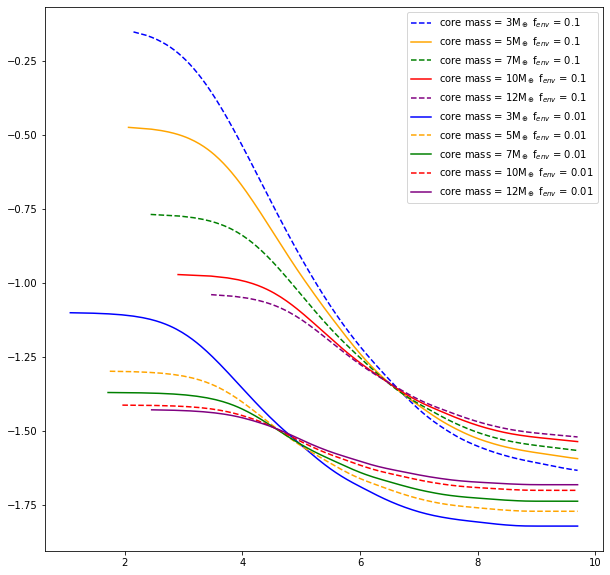

In [280]:
fig = plt.figure(figsize = (10,10))
colorlist = ['b','orange','green', 'r','purple','b','orange','green', 'r','purple']
for i,hist in enumerate(history_collection):
    R_in_cm = prof['radius_cm']*u.cm
        R_in_Rearth = []
        for r in R_in_cm:
            R_in_Rearth.append(r.to(u.Rearth).value)
    if flist[i] == 0.01:
        p = plt.plot(hist['log_star_age'],hist['log_R'], linestyle='dashed', label = label_list[i], color = colorlist[i])
    if flist[i] == 0.1:
        plt.plot(hist['log_star_age'],hist['log_R'], label = label_list[i], color = colorlist[i])
plt.legend()
plt.xlabel('')

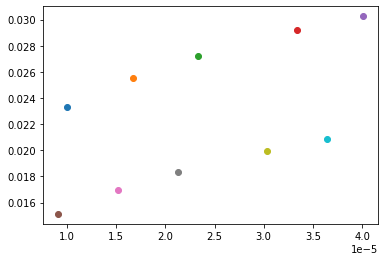

In [142]:
fig = plt.figure(figsize = (10,10))
for i,hist in enumerate(history_collection):
    lab = 'core mass = '+ masslist[i]
    plt.scatter(hist['star_mass'].iloc[-1],hist['radius'].iloc[-1])

In [192]:
import glob
dirs = glob.glob("eialab3/Lab1/LOGS*1e*",recursive = True)
dirs.sort()
print(np.shape(dirs))
final_profiles = []
for logs in dirs:
    profile_list = glob.glob(logs+'/profile*',recursive = True)
    relevant_profile = np.shape(profile_list)[0] - 1
    print("reading profle "+str(relevant_profile)+" for LOG "+logs)
    prof = pd.read_table(logs+'/profile'+str(relevant_profile)+'.data',sep = '\s+', header = 4)
    final_profiles.append(prof)

(10,)
reading profle 6 for LOG eialab3/Lab1/LOGS_inlist_1e_evolve_10ME_0.01_9.0
reading profle 7 for LOG eialab3/Lab1/LOGS_inlist_1e_evolve_10ME_0.1_9.0
reading profle 6 for LOG eialab3/Lab1/LOGS_inlist_1e_evolve_12ME_0.01_9.0
reading profle 7 for LOG eialab3/Lab1/LOGS_inlist_1e_evolve_12ME_0.1_9.0
reading profle 8 for LOG eialab3/Lab1/LOGS_inlist_1e_evolve_3ME_0.01_9.0
reading profle 14 for LOG eialab3/Lab1/LOGS_inlist_1e_evolve_3ME_0.1_9.0
reading profle 7 for LOG eialab3/Lab1/LOGS_inlist_1e_evolve_5ME_0.01_9.0
reading profle 10 for LOG eialab3/Lab1/LOGS_inlist_1e_evolve_5ME_0.1_9.0
reading profle 7 for LOG eialab3/Lab1/LOGS_inlist_1e_evolve_7ME_0.01_9.0
reading profle 8 for LOG eialab3/Lab1/LOGS_inlist_1e_evolve_7ME_0.1_9.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


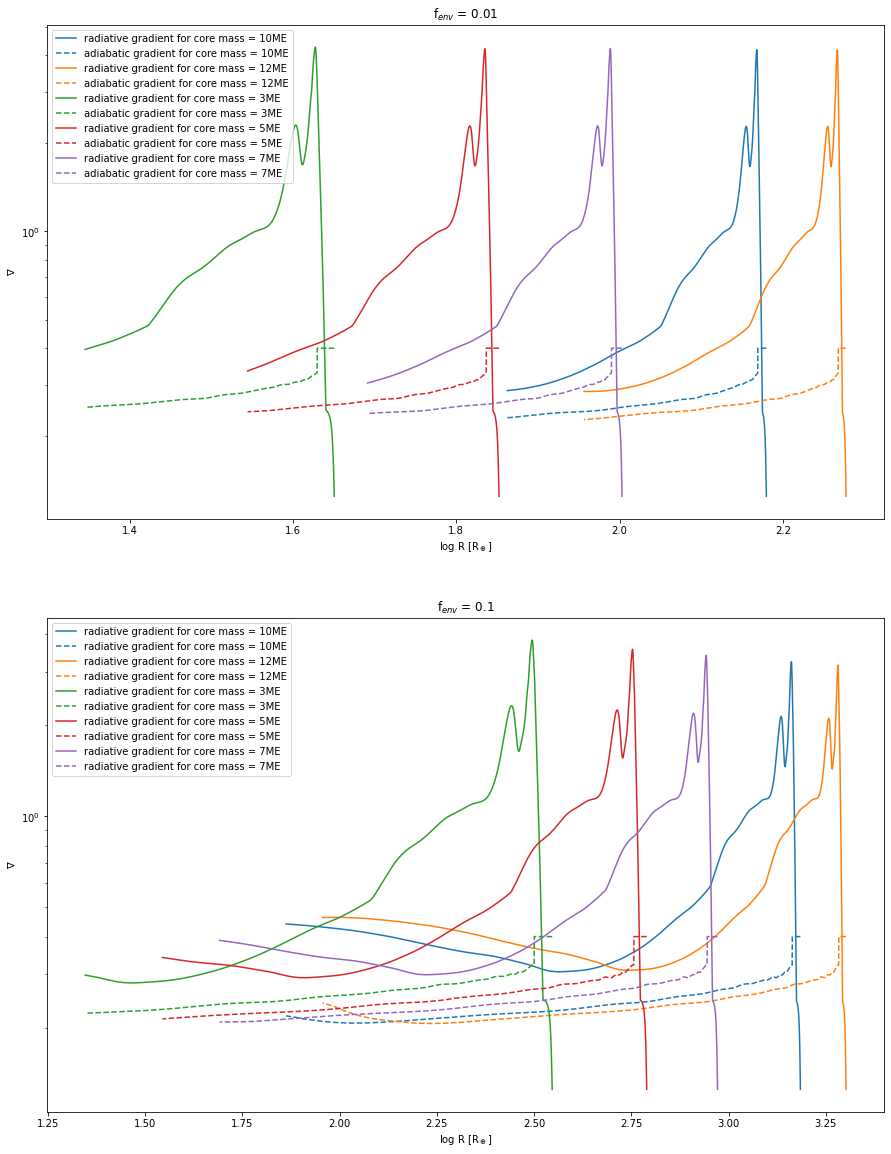

In [229]:
fig,ax = plt.subplots(2,1,figsize = (15,20))
for i,prof in enumerate(final_profiles):
    if flist[i] == 0.01:
        lab = 'core mass = '+masslist[i]
        R_in_cm = prof['radius_cm']*u.cm
        R_in_Rearth = []
        for r in R_in_cm:
            R_in_Rearth.append(r.to(u.Rearth).value)
        p = ax[0].semilogy(R_in_Rearth, prof['gradr'], label = 'radiative gradient for '+lab)
        c = p[0].get_color()
        ax[0].semilogy(R_in_Rearth, prof['grada'], label = 'adiabatic gradient for '+lab, linestyle = 'dashed', color = c)
    ax[0].set_title('f$_{env}$ = 0.01')
    ax[0].set_ylabel('\u2207')
    ax[0].set_xlabel(r'log R [R$_\oplus$]')
    ax[0].legend()
        
    if flist[i] == 0.1:
        lab = 'core mass = '+masslist[i]
        R_in_cm = prof['radius_cm']*u.cm
        R_in_Rearth = []
        for r in R_in_cm:
            R_in_Rearth.append(r.to(u.Rearth).value)
        p = ax[1].semilogy(R_in_Rearth, prof['gradr'], label = 'radiative gradient for '+lab)
        c = p[0].get_color()
        ax[1].semilogy(R_in_Rearth, prof['grada'], label = 'radiative gradient for '+lab, linestyle = 'dashed', color = c)
    ax[1].set_title('f$_{env}$ = 0.1')
    ax[1].set_ylabel('\u2207')
    ax[1].set_xlabel(r'log R [R$_\oplus$]')
    ax[1].legend()

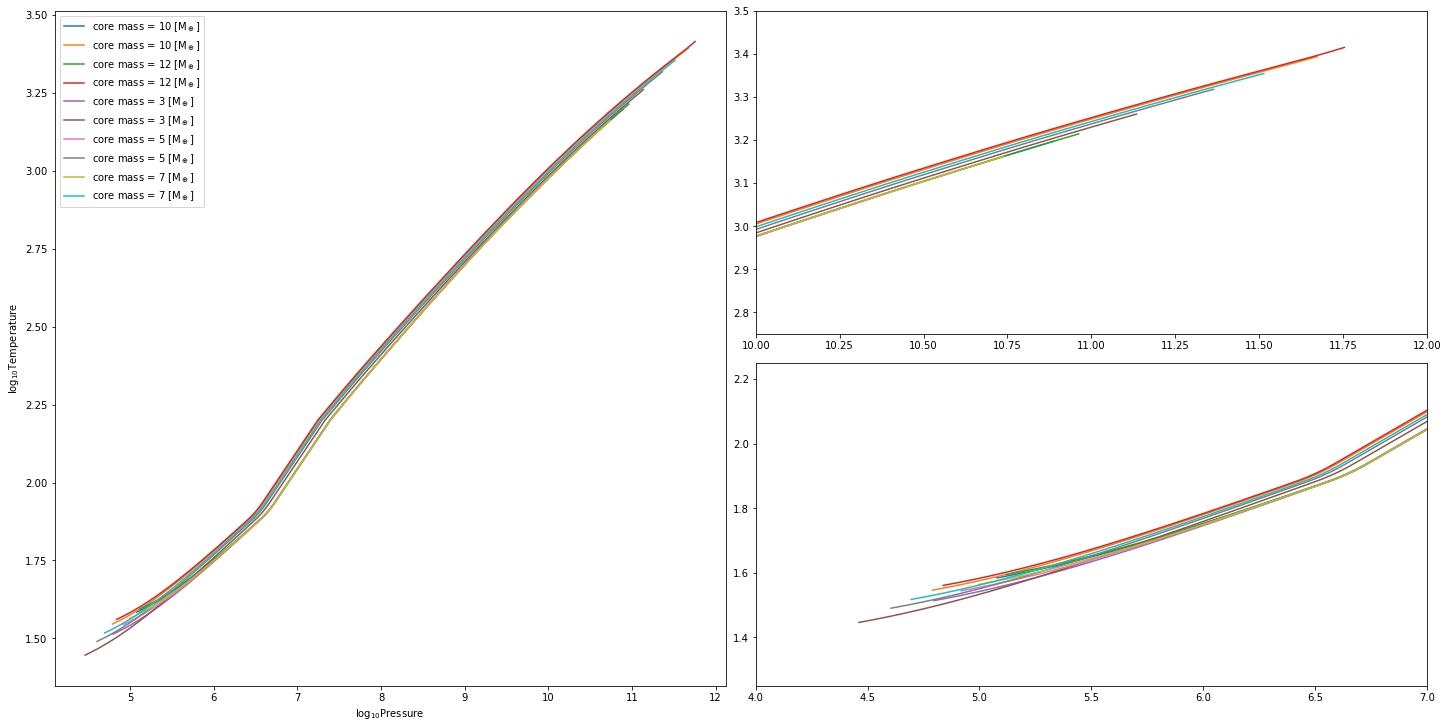

In [265]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize = (20,10),constrained_layout = True)
gs = GridSpec(4, 4, figure=fig)
ax1 = fig.add_subplot(gs[:,0:-2])
for i,prof in enumerate(final_profiles):
    lab = 'core mass = '+ masslist[i][0:-2]+r" [M$_\oplus$]"
    ax1.plot(prof['logP'], prof['logT'], label = lab)
ax1.set_xlabel('log$_{10}$Pressure')
ax1.set_ylabel('log$_{10}$Temperature')
plt.legend()
ax2 = fig.add_subplot(gs[:-2,-2:])
for i,prof in enumerate(final_profiles):
    lab = 'core mass = '+ masslist[i][0:-2]+r" [M$_\oplus$]"
    ax2.plot(prof['logP'], prof['logT'], label = lab)
    ax2.set_xlim(10,12)
    ax2.set_ylim(2.75,3.5)
ax3 = fig.add_subplot(gs[-2:,-2:])
for i,prof in enumerate(final_profiles):
    lab = 'core mass = '+ masslist[i][0:-2]+r" [M$_\oplus$]"
    ax3.plot(prof['logP'], prof['logT'], label = lab)
    ax3.set_xlim(4,7)
    ax3.set_ylim(1.25,2.25)
plt.show()